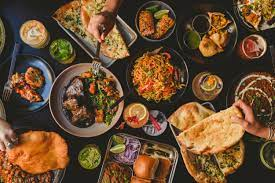

                                                         

  ##                                                                                   Food Recognition
  
  #### Team Members:
  #### Riya Aggarwal, PRN- 21070126070
  #### Rohan Saraswat, PRN- 21070126071
  #### Saksham Jain , PRN- 21070126075

### Problem Statement-
Developing an image recognition system for accurately detecting and recognizing food names from images, and providing a recipe based on the recognized food item. This would enable users to easily identify the food they are interested in, and receive recipe recommendations based on their preferences.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as np
import numpy as np
import tensorflow as tf
import cv2 as cv

### DATA PROCESSING AND REGULARISATION

In [2]:
# prevents oom errors by setting gpu consumption growth
# As it uses all the potential we have to prevent it by limiting value
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
#This library is used to check the file type of images uploaded by users to ensure they are valid image files and prevent malicious uploads.
import imghdr  

In [4]:
# Getting data from the images folder:
data_dir= "C:\\Users\\Lenovo\\Downloads\\data1" 
data="C:\\Users\\Lenovo\\Downloads\\data1"

### Applying Machine Learning Model:

In [5]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
datadir = "C:\\Users\\Lenovo\\Downloads\\data1"

In [7]:
categories = os.listdir(datadir)

In [8]:
# Extracting Features and labels:
# Converting in gray scale and resizing img
features = []
labels = []

for category in categories:
    category_path = os.path.join(datadir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.resize(img, (64, 64))
        features.append(img.flatten())
        labels.append(category)

In [9]:
# Importing neccessary Library:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
# Spliting the data:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [11]:
# Applying Standard Scaler For Standardization:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Training on RandomForestClassifier:
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [13]:
# predicting the Values:
y_pred = rf.predict(X_test)

In [14]:
# Finding out the Accuracy Score:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 57.32899022801303


In [15]:
# Importing SupportVectorMachine
from sklearn.svm import SVC 

In [16]:
# Spliting Data:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [17]:
# Applying SVM:
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)

SVC(random_state=10)

In [18]:
# Predictions:
y_pred2 = classifier.predict(X_test)


In [19]:
# Evluating the Accuracy Score:
acc = accuracy_score(y_test,y_pred2)*100
print("Accuracy(SVM): ", acc)

Accuracy(SVM):  48.20846905537459


Based on the accuracy results obtained using the RandomForestClassifier and SVM, it appears that these classifiers are not performing very well on your image dataset. The accuracy levels of 57% and 48% suggest that there may be a lot of misclassifications happening.

In this case, it might be worth considering the use of a CNN (Convolutional Neural Network) instead of these classifiers. CNNs are specifically designed for image classification tasks and have shown to perform very well in such scenarios. By using a CNN, we can leverage its ability to learn hierarchical features from the images, which can help improve the accuracy of our model.

## Applying  Deep Learning Model:

Removing Unwanted Images:

In [20]:
image_exts= ['jpeg', 'jpg','bmp','png']

In [21]:
os.listdir(data_dir) # 11 classifications in the folder.

['Biryani',
 'Dhokla',
 'Dosa',
 'Gulab_Jamun',
 'Idli',
 'Palak_Paneer',
 'Paneer Butter Masala',
 'Poha',
 'samosas',
 'Vada',
 'vadpav']

In [22]:
# Printing the Image Dataset:
os.listdir(os.path.join(data_dir,'poha'))

['0087_KandaPoha_WEB.jpg',
 '1-35.jpg',
 '1214906-2_1-aashirvaad-instant-khatta-meetha-poha-with-millets.jpg',
 '51023o5FTOL.jpg',
 '71NMmxQRe0L._SL1500_.jpg',
 '8616137744_11a3a9e4cf_z.jpg',
 '8943946395_4e7fcf55c3_o.jpg',
 'aloo-poha.jpg',
 'Aloo-Poha2.jpg',
 'Aloo-Poha_web1.jpg',
 'Batata-poha-1.jpg',
 'Batata-poha-cover-image.jpg',
 'batata-poha-recipe-1.jpg',
 'big_green_pea_poha_matar_poha-15966.jpg',
 'big_sprouted_matki_poha-14693.jpg',
 'Breakfast-Oats-Poha-Hash-9404-002.jpg',
 'c7261e02-f1f6-42fb-92f2-3d2235f4d2f9.jpg',
 'DSC_0998_1500_1000.png',
 'file1-1-13-750x750.jpeg',
 'g3itoj8g_poha_625x300_23_May_22.jpg',
 'healthy-poha-made-protein-rich-recipe.1024x1024.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image18.jpeg',
 'image19.jpeg',
 'image20.jpeg',
 'image21.jpeg',
 'image22.jpeg',
 'image23.jpeg',
 'image24.jpeg',
 'image25.jpeg',
 'image26.jpeg',
 'image27.jpeg',
 'image29.jpeg',
 'image30.jpeg',
 'image31.jpeg',
 'images.jpg',
 'images1

In [24]:
# We would be looping through the folder and would be removing unwanted images
remove_img = []
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class, image)
        try:
            img= cv.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in image_exts:
                remove_img.append(image_path)
                
        except  Exception as e:
            print("Issue with image {}".format(image_path))
remove_img

[]

In [25]:
# iterating by the images,if unwanted image found, removing it from our dataset:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class, image)
        if(image_path in remove_img):
            os.remove(image_path)

In [27]:
# Loading data
data= tf.keras.utils.image_dataset_from_directory("C:\\Users\\Lenovo\\Downloads\\data1")

Found 1531 files belonging to 11 classes.


In [28]:
# Accessing Data PipeLine
# Converting into numpy array
data_iterator= data.as_numpy_iterator()

In [29]:
data_iterator

In [30]:
# For getting another batch from hte iterator batch- images and labels
batch = data_iterator.next()

In [31]:
# Getting the length Images and Labels
len(batch)

2

In [32]:
# IMages represented as numpy arrays
batch[0].shape # Batch size of 32

(32, 256, 256, 3)

In [33]:
#class_labels = ['Briyani', 'Dhokla', 'Dosa', 'Gulab_Jamun', 'Idli', 'Palak_Panner', 'ButterPaneerMasala', 'Poha', 'Vada', 'Samosa','VadaPav']
# Images : 0 and labels : 1

batch[1] # Labels: for getting new batch

array([ 7,  7,  1,  9,  0,  3,  8,  6,  0,  8,  6,  7,  8,  4,  1,  8,  8,
        4,  3,  5,  3,  6,  8,  6,  2,  6,  0,  5, 10,  0, 10,  7])

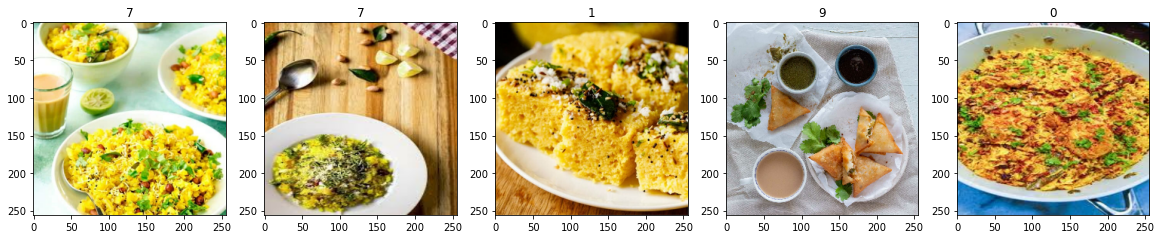

In [34]:
# Now getting the labels:
# It would help us to classify the food into catories

fig, ax= plt.subplots(ncols= 5, figsize= (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
# Maximum value of a given sequence:
batch[0].max()

255.0

In [37]:
# Preprocessing Data
# Scale data for getting values btw 0 and 1 for faster model
scaled= batch[0]/ 255
scaled.max()

1.0

In [38]:
# It speeds our data to be accessed  # Pipe line
# map is used to return dataset containing transformed elements
data= data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [39]:
scaled_iterator= data.as_numpy_iterator()
scaled_iterator.next()

(array([[[[0.7655101 , 0.7484918 , 0.6511026 ],
          [0.7706495 , 0.7411765 , 0.6649619 ],
          [0.7735389 , 0.7449849 , 0.68140906],
          ...,
          [0.9949489 , 0.9867665 , 0.9919041 ],
          [0.99205947, 0.9952742 , 0.9896227 ],
          [0.99675244, 1.        , 0.99731994]],
 
         [[0.76730347, 0.7470216 , 0.6599177 ],
          [0.76898986, 0.7447578 , 0.67470247],
          [0.7770351 , 0.74172795, 0.6921844 ],
          ...,
          [0.99944854, 0.9811374 , 0.9940365 ],
          [0.99413174, 0.99267006, 0.9971999 ],
          [0.9968269 , 0.999326  , 0.9902333 ]],
 
         [[0.7648708 , 0.745263  , 0.66691405],
          [0.7763228 , 0.7489231 , 0.67853403],
          [0.77262056, 0.73787796, 0.68015736],
          ...,
          [0.9960504 , 0.9751965 , 0.9927799 ],
          [0.99597883, 0.9882384 , 0.99591386],
          [0.9954044 , 0.99675244, 0.9945655 ]],
 
         ...,
 
         [[0.6076611 , 0.70034826, 0.5710613 ],
          [0.65248

In [40]:
scaled_iterator.next()[0].max()

1.0

In [41]:
batch= scaled_iterator.next()

In [42]:
batch[0].max()

1.0

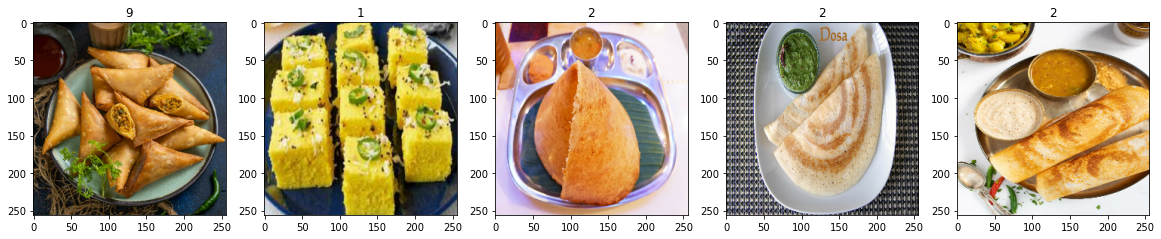

In [43]:
fig, ax= plt.subplots(ncols= 5, figsize= (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
#Scaled Labeled Images

### Spliting Dataset

In [44]:
# Spliting Dataset
len(data)
# Each 23 batch has 32 images

48

In [46]:
# Assigning values
train_size= int(len(data) *.7) # 5 batches 70%
val_size= int(len(data)*.2)+1 # 2 batches
test_size= int(len(data)*.1)+1 #1 batch

In [47]:
print(train_size, val_size, test_size)

33 10 5


In [48]:
test_size+ train_size+ val_size

48

In [49]:
# Applying take and skip
train= data.take(train_size)
val= data.skip(train_size).take(val_size) # skiping data we already takesn in train
test= data.skip(train_size+ val_size).take(test_size) # skipiping data tht we had taken in both

In [50]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [51]:
# Importing the Neccessary Imports:
from tensorflow.keras.models import Sequential
# For multiclasses:
from tensorflow.keras.utils import to_categorical

# Importing Layers, Max Polling- condensing layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [52]:
# Building neural network model for classification:
# it is built up of different layers, we would be adding layers:
model= Sequential()

In [53]:
# 16- layers relu- gives a graph function
# 16 filters to classify
# (3,3)pixels- size, 1 stride
#Stride- no of pixcels filtered:
# Explanation:
# *The first line adds a 2D convolutional layer with 16 filters, a kernel size of (3,3), a stride of 1, and a ReLU activation function. The input shape is (256,256,3) which represents an image with a height and width of 256 pixels and 3 color channels (RGB).
# *The second line adds a max-pooling layer, which reduces the spatial dimensions of the output from the previous layer.
# *The third and fourth lines repeat the first two steps, but with 32 filters and another 16 filters respectively.
# *The fifth line adds a flatten layer that transforms the output of the previous layer into a 1-dimensional array.
# *The sixth and seventh lines add two fully connected (Dense) layers with 256 and 11 neurons, respectively. The first one uses a ReLU activation function and the second one uses a softmax activation function. The softmax activation function produces output probabilities for each of the 11 classes that the model is trained to recognize.




model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) # take max value and scan and condense info

model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # condensing rows and width into 1d array in 1 value

model.add(Dense(256, activation='relu')) # 256 neurons
model.add(Dense(11, activation='softmax')) # Single output 0 or 1

# Using activation functions relu and sigmoid to transfrom output layer
# Sigmoid converts value btw 0 and 1
          

In [55]:
#Adam- Gradient based optimizer combination of Adagrad nd relu: adapts the learning rate for each parameter during training.
#LossFunction:CategoricalCrossentropy  is a standard loss function used for multi-class classification problems.
model.compile('adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()] )

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training Dataset

In [58]:
# Train
logdir= "C:\\Users\\Lenovo\\Downloads\\Logdr"

In [59]:
logdir

'C:\\Users\\Lenovo\\Downloads\\Logdr'

In [60]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [61]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [62]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
# Converting the labels (y) to one-hot encoded vectors.
#One-hot encoding is a technique used to convert categorical data,

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
num_classes = 11

train = train.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val = val.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

In [65]:
#The training progress and performance metrics are logged using a TensorBoard callback.
hist= model.fit(train, epochs= 10, validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/10
33/33 [==============================] - 87s 2s/step - loss: 2.4034 - accuracy: 0.1468 - precision: 0.2500 - recall: 0.0095 - val_loss: 2.2195 - val_accuracy: 0.1937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 85s 2s/step - loss: 2.0098 - accuracy: 0.3182 - precision: 0.6566 - recall: 0.0616 - val_loss: 1.8722 - val_accuracy: 0.3125 - val_precision: 0.7879 - val_recall: 0.0812
Epoch 3/10
33/33 [==============================] - 85s 2s/step - loss: 1.4958 - accuracy: 0.4981 - precision: 0.7635 - recall: 0.2415 - val_loss: 1.5183 - val_accuracy: 0.4375 - val_precision: 0.6923 - val_recall: 0.3094
Epoch 4/10
33/33 [==============================] - 84s 2s/step - loss: 1.1056 - accuracy: 0.6392 - precision: 0.8375 - recall: 0.4489 - val_loss: 1.2473 - val_accuracy: 0.6187 - val_precision: 0.8214 - val_recall: 0.3594
Epoch 5/10
33/33 [==============================] - 85s 2s/step - loss: 0.6990 - accuracy: 0.7955 - prec

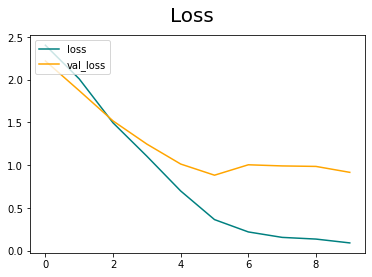

In [66]:
# Ploting Performance: Loss
fig= plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

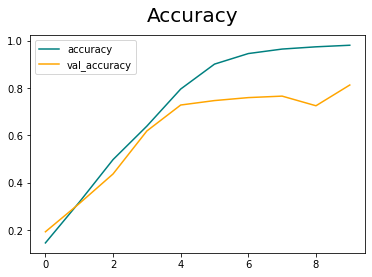

In [67]:
# Accuracy
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label= 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [68]:
# Deploying DEEP Learning Model  Shape- 256,256
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [69]:
# Saving model
tf.keras.models.save_model(model,'my_model3.hdf5')

In [70]:
# %%writefile app.py
# import streamlit as st
# import tensorflow as tf

# st.set_option('deprecation.showfileUploderEncoding', False)
# @st.cache(allow_output_mutation=True)
# def load_model():
#     model= tf.keras.models.load_model("C:\\Users\\Lenovo\\Untitled Folder 4\\my_model2.hdf5")
#     return model


# model= load_model()
# st.write("""
#          # FOOD CLASSIFICATION  

# """)



# file= st.file_uploder("Please upload an food image", type=['jpeg', 'jpg','bmp','png'])


# import cv2
# from PIL import Image, ImageOps
# import numpy as np
# def import_and_predict(image_data,model):
#     size= (256,256)
#     image= ImageOps.fit(image,data,size,Image.ANTIALIAS)
#     img= np.asarray(image)
#     img_reshape= img[np.newaxis,...]
#     prediction= model.predict(img_reshape)
    
#     return prediction


# if file is None:
#     st.text("Please upload an Image file")
    
# else:
#     image= Image.open(file)
#     st.image(image, use_column_width=True)
#     predictions= import_and_predict(image,model)
#     class_names= ['Briyani', 'Dhokla', 'Dosa', 'Gulab_Jamun', 'Idli', 'Palak_Panner', 'ButterPaneerMasala', 'Poha', 'Vada', 'Samosa','VadaPav']
#     string= "This image most likely is: " +class_names[np.argmax(predictions)]
#     st.success(string)

In [71]:
# Evaluation Step:
# For classification:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre= Precision()
re= Recall()
acc= BinaryAccuracy()

In [73]:
len(test)

5

In [74]:
#evaluating the trained model on the test dataset using batch processing.
for batch in test.as_numpy_iterator():
    X,y= batch
    yhat= model.predict(X)
    y_onehot= tf.one_hot(y, depth= num_classes)
    pre.update_state(y_onehot, yhat)
    re.update_state(y_onehot,yhat)
    acc.update_state(y_onehot, yhat)

1/1 [==============================] - 0s 229ms/step


In [101]:
# for batch in test.as_numpy_iterator():


In [76]:
# Printing results
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.7714285850524902, Recall:0.6967741847038269, Accuracy: 0.9536656737327576


### Evaluating:

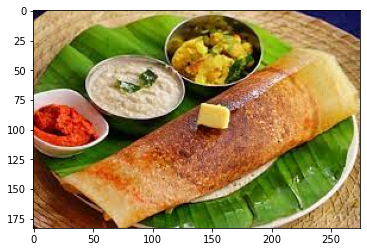

In [96]:
# Testing: Taking Random Image:
imgtest = cv.imread("C:\\Users\\Lenovo\\Downloads\\Food_detect_folder\\dosa_test.jpeg")
plt.imshow(cv.cvtColor(imgtest, cv.COLOR_BGR2RGB)) # For fixing color
im = cv.cvtColor(imgtest, cv.COLOR_BGR2RGB)

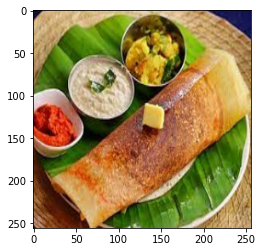

In [97]:
# Resizing image
resize= tf.image.resize(im, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
# resize = resize / 255.0  # normalize the image
# resize = tf.image.grayscale_to_rgb(resize)
# resize = np.expand_dims(resize, axis=0)  # expand dimensions to include batch size dimension
# resize = tf.convert_to_tensor(resize, dtype=tf.float32)

In [98]:
np.expand_dims(resize,0).shape


(1, 256, 256, 3)

In [81]:
# 0-Briyani,  1- Dhokla ,2- Dosa ,3- Gulab_Jamun ,4- Idli, 5- Palak_Panner, 6- ButterPaneerM, 7- Poha, 8- Vada , 9- Samosa
#10- Vada Pav

In [99]:
# Predicting the array classes.
yhat= model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 62ms/step


array([[1.6776976e-05, 4.3715863e-05, 9.9844700e-01, 1.2300950e-06,
        3.9704438e-04, 5.9412417e-07, 5.9076775e-08, 1.5026569e-05,
        9.4466936e-04, 1.4044015e-06, 1.3250706e-04]], dtype=float32)

In [100]:
# Printing the predicted food type.

class_labels = ['Briyani', 'Dhokla', 'Dosa', 'Gulab_Jamun', 'Idli', 'Palak_Panner', 'ButterPaneerMasala', 'Poha', 'Vada', 'Samosa','VadaPav']

# Get the index of the highest predicted value
pred_index = np.argmax(yhat)

# Get the name of the corresponding class label
pred_class = class_labels[pred_index]

# Print the name of the predicted class and its recipe
if pred_class == 'Briyani':
    print('Briyani')
elif pred_class == 'Dhokla':
    print('Dhokla recipe')
elif pred_class == 'Dosa':
    print('Dosa recipe')
elif pred_class == 'Gulab_Jamun':
    print(' Its Gulab Jamun ')
elif pred_class == 'Idli':
    print('Idli recipe')
elif pred_class == 'Palak_Panner':
    print('Palak Panner recipe')
elif pred_class == 'Poha':
    print('Poha recipe')
elif pred_class == 'Vada':
    print('Vada recipe')
elif pred_class == 'Samosa':
    print('Samosa recipe')
elif pred_class == 'Vada Pav':
    print('Vada Pav recipe')

Dosa recipe
